In [1]:
import chromadb

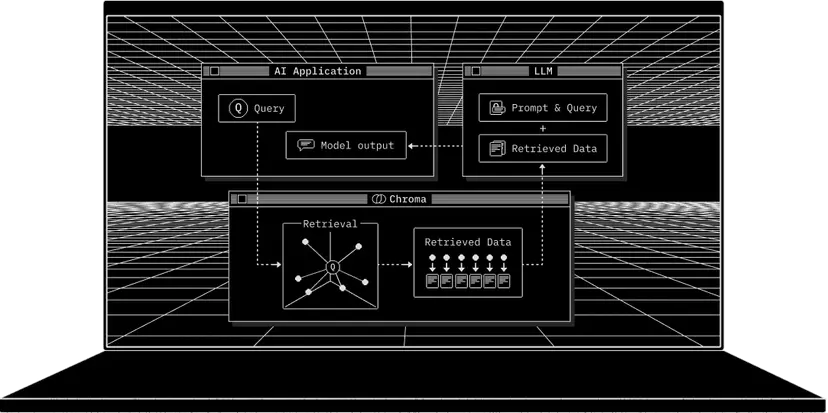

In [2]:
# creating a client of chromadb to handle  things

In [3]:
chroma_client = chromadb.Client()

In [20]:
# creating a collection (where u store your embeddings)
# chromadb will handle embeddings and indexing both (uses its default embedding model if u dont specify one)

In [4]:
collection = chroma_client.create_collection(name="mycollection")

In [7]:
help(chroma_client.create_collection)

Help on method create_collection in module chromadb.api.client:

create_collection(name: str, configuration: Optional[chromadb.api.collection_configuration.CreateCollectionConfiguration] = None, metadata: Optional[Dict[str, Any]] = None, embedding_function: Optional[chromadb.api.types.EmbeddingFunction[Union[List[str], List[numpy.ndarray[tuple[Any, ...], numpy.dtype[Union[numpy.uint64, numpy.int64, numpy.float64]]]]]]] = <chromadb.utils.embedding_functions.DefaultEmbeddingFunction object at 0x7fab0a1e6030>, data_loader: Optional[chromadb.api.types.DataLoader[List[Optional[numpy.ndarray[tuple[Any, ...], numpy.dtype[Union[numpy.uint64, numpy.int64, numpy.float64]]]]]]] = None, get_or_create: bool = False) -> chromadb.api.models.Collection.Collection method of chromadb.api.client.Client instance
    Create a new collection with the given name and metadata.
    Args:
        name: The name of the collection to create.
        metadata: Optional metadata to associate with the collection.
  

In [5]:
# adding text doc  (this will be temporary in memory)
# u can also create a persistent directory if u want save it for later use
collection.add(
    ids = ['id1', 'id2'],
    documents=[
        "tomato is a fruit",
        "apple is a brand"
    ]
)

In [12]:
help(collection.add)

Help on method add in module chromadb.api.models.Collection:

add(ids: Union[str, List[str]], embeddings: Union[numpy.ndarray[tuple[Any, ...], numpy.dtype[Union[numpy.int32, numpy.float32]]], List[numpy.ndarray[tuple[Any, ...], numpy.dtype[Union[numpy.int32, numpy.float32]]]], Sequence[float], Sequence[int], List[Union[Sequence[float], Sequence[int]]], NoneType] = None, metadatas: Union[Mapping[str, Union[str, int, float, bool, chromadb.base_types.SparseVector, NoneType]], List[Mapping[str, Union[str, int, float, bool, chromadb.base_types.SparseVector, NoneType]]], NoneType] = None, documents: Union[str, List[str], NoneType] = None, images: Union[numpy.ndarray[tuple[Any, ...], numpy.dtype[Union[numpy.uint64, numpy.int64, numpy.float64]]], List[numpy.ndarray[tuple[Any, ...], numpy.dtype[Union[numpy.uint64, numpy.int64, numpy.float64]]]], NoneType] = None, uris: Union[str, List[str], NoneType] = None) -> None method of chromadb.api.models.Collection.Collection instance
    Add embeddings

In [19]:
collection.get()  # content inside the collection

{'ids': ['id1', 'id2'],
 'embeddings': None,
 'documents': ['tomato is a fruit', 'apple is a brand'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [None, None]}

In [29]:
# query the collection

In [8]:
result = collection.query(
    query_texts=["device"],
    n_results=3
)

In [9]:
result

{'ids': [['id2', 'id1']],
 'embeddings': None,
 'documents': [['apple is a brand', 'tomato is a fruit']],
 'uris': None,
 'included': ['metadatas', 'documents', 'distances'],
 'data': None,
 'metadatas': [[None, None]],
 'distances': [[1.315529704093933, 1.4778743982315063]]}

In [ ]:
# above we can see that the distance of our query is much less for "apple is a brand"
# so it is the most similar
# n_result default val => 10

In [50]:
help(collection.upsert)

Help on method upsert in module chromadb.api.models.Collection:

upsert(ids: Union[str, List[str]], embeddings: Union[numpy.ndarray[tuple[Any, ...], numpy.dtype[Union[numpy.int32, numpy.float32]]], List[numpy.ndarray[tuple[Any, ...], numpy.dtype[Union[numpy.int32, numpy.float32]]]], Sequence[float], Sequence[int], List[Union[Sequence[float], Sequence[int]]], NoneType] = None, metadatas: Union[Mapping[str, Union[str, int, float, bool, chromadb.base_types.SparseVector, NoneType]], List[Mapping[str, Union[str, int, float, bool, chromadb.base_types.SparseVector, NoneType]]], NoneType] = None, documents: Union[str, List[str], NoneType] = None, images: Union[numpy.ndarray[tuple[Any, ...], numpy.dtype[Union[numpy.uint64, numpy.int64, numpy.float64]]], List[numpy.ndarray[tuple[Any, ...], numpy.dtype[Union[numpy.uint64, numpy.int64, numpy.float64]]]], NoneType] = None, uris: Union[str, List[str], NoneType] = None) -> None method of chromadb.api.models.Collection.Collection instance
    Update t

In [10]:
collection.upsert(
    ids = ['id2'],
    documents=[
        "apple is a device company"
    ]
)

In [11]:
# if u want to update an existing value
collection.upsert(
    ids= ['id3'],
    documents=["oranges are good"]
)

In [12]:
collection.get()

{'ids': ['id1', 'id2', 'id3'],
 'embeddings': None,
 'documents': ['tomato is a fruit',
  'apple is a device company',
  'oranges are good'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [None, None, None]}

In [13]:
result = collection.query(
    query_texts=["pizza"],
    n_results=2
)

In [14]:
result

{'ids': [['id1', 'id3']],
 'embeddings': None,
 'documents': [['tomato is a fruit', 'oranges are good']],
 'uris': None,
 'included': ['metadatas', 'documents', 'distances'],
 'data': None,
 'metadatas': [[None, None]],
 'distances': [[1.2872450351715088, 1.5817451477050781]]}

A collection is the fundamental unit of storage and querying in Chroma. Each collection contains a set of items, where each item consists of:

    An ID uniquely identifying the item
    An embedding vector
    Optional metadata (key-value pairs)
    A document that belongs to the provided embedding

    Databases

Collections are grouped into databases, which serve as a logical namespace. This is useful for organizing collections by purpose—for example, separating environments like "staging" and "production", or grouping applications under a common schema.

Each database contains multiple collections, and each collection name must be unique within a database.

# Persistent client

You can configure Chroma to save and load the database from your local machine, using the PersistentClient.

Data will be persisted automatically and loaded on start (if it exists).

The path is where Chroma will store its database files on disk, and load them on start. If you don't provide a path, the default is .chroma

-> he client object has a few useful convenience methods.

    heartbeat() - returns a nanosecond heartbeat. Useful for making sure the client remains connected.
    reset() - empties and completely resets the database. ⚠️ This is destructive and not reversible.

this persistent client will work almost exactly the same

## How to add multiple files ?

The Process: Consolidate and Add

Our strategy is to create three master lists:

    all_documents (a list of all text chunks)

    all_metadatas (a list of corresponding metadata dictionaries)

    all_ids (a list of unique IDs for each chunk)

    We will process each file and append its contents to these master lists. Finally, we'll use a single collection.add() command to store everything.

## How to Add New Knowledge ?

The process for adding a new CSV file (or any new source) is a simple, repeatable workflow.

    Process: You take your new file (e.g., new_law_faqs.csv).

    Chunk & Standardize: You run it through the same processing script we built. This turns the file into the three standard lists: all_documents, all_metadatas, and all_ids.

    Add to Collection: You then use one of these two commands to add the new data to your existing collection:

        collection.add(...): This is for adding new, unique documents. It's fast and simple.

        collection.upsert(...): This is the more powerful and recommended method. "Upsert" means "UPdate or InSERT."

            If a document in your batch has a new id, it will be inserted.

            If a document has an id that already exists in the database, it will be updated with the new content and metadata.

    Using collection.upsert() is a fantastic, robust practice. It means you can not only add new knowledge but also refresh or correct old knowledge just by re-processing a file and upserting it

## Different Metadata ? we can have it, but should we do it ?

Is it Possible? Yes. ChromaDB is "schema-less" with its metadata. You can technically add one document with {"category": "A"} and another with {"author": "B", "topic": "C"}. The database will not stop you.

The Two Big Problems It Creates:

    Impossible Filtering: Later, you might want to ask your agent, "Answer only from the 'Motor Vehicles Act'." To do this, you'd filter your search for metadata where category == 'Motor Vehicles Act, 1988'. But this will fail to find any chunks that don't have a category field, even if they are relevant. Your filtering becomes completely unreliable.

    Application Crashes: Your Streamlit app code might try to retrieve a chunk and display its source link with metadata['url']. If a chunk is retrieved that doesn't have a url key, your app will crash with a KeyError.

so solution and best practice =>

The Solution (Our "Harmonization" Step): This is precisely why we designed the processing scripts. Their job is to be the strict gatekeeper. They must ensure that every single document, no matter where it came from, is forced into our standard metadata structure (e.g., {'category': ..., 'source': ...}).

If a new file doesn't have a category, our script should assign one, even if it's just "Uncategorized". If it doesn't have a source, we assign "Source Not Found".

This way, the keys are always consistent, which makes your application robust, reliable, and bug-free.

#### u must provide unique ids for each document u add or upsert. chromadb forces you to do this. it is also important if u want to update or delete anything from the vector db

## Implementation

chunk the text file -> add to the collection -> query

In [15]:
import re  # We use this for our chunking "refinement"

# --- CONFIGURATION ---
INPUT_TEXT_FILE = 'RevIns.txt'  # The name of your raw text file

def standardize_text_file(file_path):
    """
    Reads a raw text file and refines it into the three
    standard lists required by ChromaDB.
    
    This is the "Mise en Place" or "Refinement" step.
    """
    
    print(f"Starting refinement for: {file_path}")
    
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            full_text = f.read()
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        # Return empty lists on failure
        return [], [], []

    # === 1. Chunking (The "Jade Slip" Carving) ===
    # We split the text by paragraphs (two or more newlines)
    text_chunks = re.split(r'\n\s*\n', full_text)
    
    print(f"File read. Found {len(text_chunks)} potential chunks.")

    # === 2. Prepare Empty Lists ===
    # These are the "containers" for our refined materials
    documents_list = []
    metadatas_list = []
    ids_list = []

    # === 3. Loop, Assign, and Standardize ===
    # We now process each chunk one by one
    
    processed_count = 0
    for i, chunk in enumerate(text_chunks):
        chunk_text = chunk.strip()  # Clean the chunk
        
        # Only process non-empty chunks
        if chunk_text:
            # 1. Add the "Document" (the text itself)
            documents_list.append(chunk_text)
            
            # 2. Add the "Metadata" (the descriptive label)
            metadatas_list.append({
                'source_file': file_path,
                'chunk_index': i
            })
            
            # 3. Add the "ID" (the unique, traceable name)
            chunk_id = f"{file_path}_chunk_{i}"
            ids_list.append(chunk_id)
            
            processed_count += 1

    print(f"Refinement complete. Created {processed_count} valid chunks.")
    
    # Return the three lists, ready for storage
    return documents_list, metadatas_list, ids_list

# --- This block runs the script so you can test it ---
if __name__ == "__main__":
    
    """# Create a dummy file for testing if it doesn't exist
    try:
        with open(INPUT_TEXT_FILE, 'x', encoding='utf-8') as f:
            f.write("This is the first paragraph. It is about cultivation.\n\n")
            f.write("This is the second paragraph. It is about Gu worms.\n\n")
            f.write("\n\n") # This empty one should be skipped
            f.write("This is the third paragraph. It is about refinement.")
        print(f"Created sample file: '{INPUT_TEXT_FILE}'")
    except FileExistsError:
        print(f"Using existing file: '{INPUT_TEXT_FILE}'")""";

    # Run the main function
    docs, metas, ids = standardize_text_file(INPUT_TEXT_FILE)
    
    # --- Verification Step ---
    # Let's print the first 2 chunks to see our results
    print("\n--- Verification (First 2 Chunks) ---")
    
    for i in range(min(2, len(docs))):
        print(f"\nChunk {i+1}:")
        print(f"  ID: {ids[i]}")
        print(f"  Metadata: {metas[i]}")
        print(f"  Document: '{docs[i]}'")
        
    print(f"\nTotal items in lists: {len(docs)}")
    print("These three lists are now ready to be passed to 'collection.add()'")

Starting refinement for: RevIns.txt
File read. Found 32 potential chunks.
Refinement complete. Created 32 valid chunks.

--- Verification (First 2 Chunks) ---

Chunk 1:
  ID: RevIns.txt_chunk_0
  Metadata: {'source_file': 'RevIns.txt', 'chunk_index': 0}
  Document: 'Chapter 1 – The heart of a demon never has regret even in death
“Fang Yuan, quietly hand over the Spring Autumn Cicada and I’ll give you
a quick death!”
“Old bastard Fang, stop attempting to resist anymore, today all of the major
factions of justice have combined together just to destroy your devil lair.
This place is already covered in inescapable nets, this time you will
definitely be decapitated!”
“Fang Yuan you damn demon, just because you wanted to cultivate the
Spring Autumn Cicada, you’ve gone and killed thousands of people. You’ve
committed too many unforgivable, heinous sins!“
“Demon, 300 years ago you insulted me, took away my body’s purity, killed
my entire family and executed my nine generations. From that momen

In [16]:
# now from the text file we have docs, metas, ids

In [17]:
client = chromadb.PersistentClient(path="./test_chromadb")

In [18]:
collection = client.get_or_create_collection(name="test_revins_collection")

In [19]:
collection.upsert(
    ids = ids,
    documents=docs,
    metadatas=metas
)

In [20]:
ids

['RevIns.txt_chunk_0',
 'RevIns.txt_chunk_1',
 'RevIns.txt_chunk_2',
 'RevIns.txt_chunk_3',
 'RevIns.txt_chunk_4',
 'RevIns.txt_chunk_5',
 'RevIns.txt_chunk_6',
 'RevIns.txt_chunk_7',
 'RevIns.txt_chunk_8',
 'RevIns.txt_chunk_9',
 'RevIns.txt_chunk_10',
 'RevIns.txt_chunk_11',
 'RevIns.txt_chunk_12',
 'RevIns.txt_chunk_13',
 'RevIns.txt_chunk_14',
 'RevIns.txt_chunk_15',
 'RevIns.txt_chunk_16',
 'RevIns.txt_chunk_17',
 'RevIns.txt_chunk_18',
 'RevIns.txt_chunk_19',
 'RevIns.txt_chunk_20',
 'RevIns.txt_chunk_21',
 'RevIns.txt_chunk_22',
 'RevIns.txt_chunk_23',
 'RevIns.txt_chunk_24',
 'RevIns.txt_chunk_25',
 'RevIns.txt_chunk_26',
 'RevIns.txt_chunk_27',
 'RevIns.txt_chunk_28',
 'RevIns.txt_chunk_29',
 'RevIns.txt_chunk_30',
 'RevIns.txt_chunk_31']

In [21]:
collection.get("RevIns.txt_chunk_3")

{'ids': ['RevIns.txt_chunk_3'],
 'embeddings': None,
 'documents': ['By now the gray mountain rock beneath Fang Yuan’s feet had long been\nstained a deep red. Due to losing too much blood, his face had become\ndeathly pale; in the afterglow of the sunset, it suddenly had a brilliant luster\nupon it.\nLooking at the setting sun, Fang Yuan lightly laughed. “The sun sets above\nthe blue mountain, the autumn moon with the wind of spring. The morning\nis fine like hair and night is like snow, whether you succeed or fail when\nyou look back there’s nothing left.”\nAs he said this, memories of his previous life on Earth emerged before his\neyes.'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [{'chunk_index': 3, 'source_file': 'RevIns.txt'}]}

In [27]:
collection.get("RevIns.txt_chunk_3")['metadatas']

[{'source_file': 'RevIns.txt', 'chunk_index': 3}]

In [53]:
collection.query(
    query_texts=["perseverance"],
    n_results=2
)

{'ids': [['RevIns.txt_chunk_21', 'RevIns.txt_chunk_13']],
 'embeddings': None,
 'documents': [['In his memories are a multitude of all kinds of treasures and precious items\nthat no one has opened yet in this time. All the big events and incidents he\ncan easily grasp by the veins of history. There are a countless number of\nfigures: some are predecessors of hidden levels; some are geniuses, some\npeople not even born yet. Also in these 500 years of life are memories of\npainstaking cultivation and rich combat experience.\nWith all these memories and experiences, he had undeniably grasped the\noverall situation and upcoming opportunities. With good planning and\nexecution, he could empower the situation with great fierceness and\nelegance. It was not a problem now that he could take a step ahead of\nothers, breaking the higher boundaries!',
   'Every year to compete for these young geniuses, the elders would fight\namong themselves to the point of reddened ears and bleeding heads.\nThe

# Trying with Gemini Pro embeddings

In [55]:
import google.generativeai as genai
import os
from dotenv import load_dotenv
from chromadb import Documents, EmbeddingFunction, Embeddings

/home/aditya/RAG Practice/RAG_GENAI/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [56]:
# --- 1. Configuration ---
DB_PATH = "./test_chromadb"  # Directory to save the persistent database
COLLECTION_NAME = "revins_gemini_embeddings" # Name for our main collection
# GEMINI_EMBEDDING_MODEL = "models/text-embedding-004"
GEMINI_EMBEDDING_MODEL = "gemini-embedding-001"

In [57]:
# --- 2. Load API Key ---
# Load environment variables from a .env file (recommended for API keys)
load_dotenv()
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')

if not GOOGLE_API_KEY:
    print("Error: GOOGLE_API_KEY not found.")
    print("Please set the GOOGLE_API_KEY environment variable (e.g., in a .env file).")
    exit()

In [58]:
# Configure the Gemini client
genai.configure(api_key=GOOGLE_API_KEY)

If i need to use different embedding models from api and stuff
I need to define embedding function we cannot directly pass the model name. Wrapper class is necessary


In [63]:
# --- 3. Define the Custom Gemini Embedding Function ---
# ChromaDB requires a specific class structure for embedding functions.
# --- Define the Custom Gemini Embedding Function ---
class GeminiEmbeddingFunction(EmbeddingFunction):
    """
    Custom embedding function using the Gemini API.
    Includes an __init__ method to satisfy future requirements.
    """
    # --- ADD THIS METHOD ---
    def __init__(self):
        # Even an empty init method satisfies the requirement.
        # We could also initialize things here if needed in the future.
        pass
    # ---------------------

    def __call__(self, input: Documents) -> Embeddings:
        model = "models/text-embedding-004" # Or your GEMINI_EMBEDDING_MODEL variable
        title = "Legal Document Embeddings" # Optional title
        try:
            result = genai.embed_content(model=model,
                                         content=input,
                                         task_type="RETRIEVAL_DOCUMENT",
                                         title=title)
            return result['embedding']
        except Exception as e:
            print(f"Error embedding content with Gemini: {e}")
            # Return a list of empty lists with the correct shape on failure
            return [[] for _ in input]

In [64]:
# --- 4. Initialize ChromaDB Client ---
print(f"Initializing ChromaDB client at path: {DB_PATH}")
client = chromadb.PersistentClient(path=DB_PATH)

Initializing ChromaDB client at path: ./test_chromadb


In [65]:
# --- 5. Create (or Get) the Collection with the Custom Embedding Function ---
print(f"Getting or creating collection: '{COLLECTION_NAME}'")

Getting or creating collection: 'revins_gemini_embeddings'


In [66]:
# Instantiate our custom embedding function
gemini_ef = GeminiEmbeddingFunction()

the GeminiEmbeddingFunction class will work perfectly fine whether the original data came from a CSV, TXT, JSON, or any other file format.

You only pass the column containing the text (specifically, the list of chunked text strings derived from that column) to the embedding function wrapper class, not the entire CSV file.
remember priorly we separated our actuall text, metadata into individual list

In [67]:
# Use get_or_create_collection. Pass our custom function here.
try:
    collection = client.get_or_create_collection(
        name=COLLECTION_NAME,
        embedding_function=gemini_ef # This tells Chroma to use Gemini!
    )
    print(f"Successfully got/created collection '{collection.name}'!")
    print(f"Collection currently has {collection.count()} documents.")

    # --- Optional: Add a sample document to test ---
    # print("\nAdding a sample document to test...")
    # try:
    #     collection.add(
    #         documents=["This is a test document about legal matters."],
    #         metadatas=[{"source": "test_script"}],
    #         ids=["test_doc_001"]
    #     )
    #     print("Sample document added successfully.")
    #     print(f"Collection now contains {collection.count()} documents.")
    # except Exception as e:
    #     print(f"Error adding sample document: {e}")

except Exception as e:
    print(f"Error creating/getting collection: {e}")

Successfully got/created collection 'revins_gemini_embeddings'!
Collection currently has 0 documents.


In [68]:
client.list_collections()

[Collection(name=test_revins_collection),
 Collection(name=revins_gemini_embeddings)]

In [69]:
collection.upsert(
    ids=ids,
    documents=docs,
    metadatas=metas
)

In [70]:
collection.get("RevIns.txt_chunk_3")

{'ids': ['RevIns.txt_chunk_3'],
 'embeddings': None,
 'documents': ['By now the gray mountain rock beneath Fang Yuan’s feet had long been\nstained a deep red. Due to losing too much blood, his face had become\ndeathly pale; in the afterglow of the sunset, it suddenly had a brilliant luster\nupon it.\nLooking at the setting sun, Fang Yuan lightly laughed. “The sun sets above\nthe blue mountain, the autumn moon with the wind of spring. The morning\nis fine like hair and night is like snow, whether you succeed or fail when\nyou look back there’s nothing left.”\nAs he said this, memories of his previous life on Earth emerged before his\neyes.'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [{'chunk_index': 3, 'source_file': 'RevIns.txt'}]}

In [71]:
collection.query(
    query_texts=["perseverance"],
    n_results=2
)

{'ids': [['RevIns.txt_chunk_21', 'RevIns.txt_chunk_30']],
 'embeddings': None,
 'documents': [['In his memories are a multitude of all kinds of treasures and precious items\nthat no one has opened yet in this time. All the big events and incidents he\ncan easily grasp by the veins of history. There are a countless number of\nfigures: some are predecessors of hidden levels; some are geniuses, some\npeople not even born yet. Also in these 500 years of life are memories of\npainstaking cultivation and rich combat experience.\nWith all these memories and experiences, he had undeniably grasped the\noverall situation and upcoming opportunities. With good planning and\nexecution, he could empower the situation with great fierceness and\nelegance. It was not a problem now that he could take a step ahead of\nothers, breaking the higher boundaries!',
   'What was there to be gain from resentment?\nThinking about if from another point of view, he could understand his\nyounger brother, aunt and un

In [ ]:
# in default embedding we got query result => 21, 13
# here in gemini embedding we got => 21, 30
# lets check the content of these chunks to see (gemini was able to perform better actually)

In [76]:
print(collection.get("RevIns.txt_chunk_21")["documents"])

['In his memories are a multitude of all kinds of treasures and precious items\nthat no one has opened yet in this time. All the big events and incidents he\ncan easily grasp by the veins of history. There are a countless number of\nfigures: some are predecessors of hidden levels; some are geniuses, some\npeople not even born yet. Also in these 500 years of life are memories of\npainstaking cultivation and rich combat experience.\nWith all these memories and experiences, he had undeniably grasped the\noverall situation and upcoming opportunities. With good planning and\nexecution, he could empower the situation with great fierceness and\nelegance. It was not a problem now that he could take a step ahead of\nothers, breaking the higher boundaries!']


['In his memories are a multitude of all kinds of treasures and precious items\nthat no one has opened yet in this time. All the big events and incidents he\ncan easily grasp by the veins of history. There are a countless number of\nfigures: some are predecessors of hidden levels; some are geniuses, some\npeople not even born yet. Also in these 500 years of life are memories of\npainstaking cultivation and rich combat experience.\nWith all these memories and experiences, he had undeniably grasped the\noverall situation and upcoming opportunities. With good planning and\nexecution, he could empower the situation with great fierceness and\nelegance. It was not a problem now that he could take a step ahead of\nothers, breaking the higher boundaries!']

In [77]:
print(collection.get("RevIns.txt_chunk_13")["documents"])

['Every year to compete for these young geniuses, the elders would fight\namong themselves to the point of reddened ears and bleeding heads.\nThey should stay well rested and replenish themselves until tomorrow\ncomes where the competition begins.\nEspecially with that Gu Yue Fang Yuan, whose A grade potential was\nextremely huge. Not counting the fact that both his parents were deceased,\nand also that he was one of the two only descendants of Fang Zhi’s\nbloodline left. If one was able to get their hands on and bring him into their\nown family line, with great care and training, one could secure himself a\nhundred years of prosperity!\n“However, I’m going to go ahead and say what needs to be said first. When\nyou compete, do it fair and square; no tricks and conspiracies are allowed,\nor damage to the clan’s unity. Please keep this in mind, all of you!” The\nclan head strictly instructed.\n“We wouldn’t dare, we wouldn’t dare.”\n“We’ll keep it in mind.”\n“Then this is good night, plea

['Every year to compete for these young geniuses, the elders would fight\namong themselves to the point of reddened ears and bleeding heads.\nThey should stay well rested and replenish themselves until tomorrow\ncomes where the competition begins.\nEspecially with that Gu Yue Fang Yuan, whose A grade potential was\nextremely huge. Not counting the fact that both his parents were deceased,\nand also that he was one of the two only descendants of Fang Zhi’s\nbloodline left. If one was able to get their hands on and bring him into their\nown family line, with great care and training, one could secure himself a\nhundred years of prosperity!\n“However, I’m going to go ahead and say what needs to be said first. When\nyou compete, do it fair and square; no tricks and conspiracies are allowed,\nor damage to the clan’s unity. Please keep this in mind, all of you!” The\nclan head strictly instructed.\n“We wouldn’t dare, we wouldn’t dare.”\n“We’ll keep it in mind.”\n“Then this is good night, please take care.”\nThe clan elders slowly dispersed with deep thoughts.\nNot long after that, the long corridor became quiet. The wind from the\nspring rain breezed through the window, and the clan head lightly walked\ntowards the window.']

In [78]:
print(collection.get("RevIns.txt_chunk_30")["documents"])

['What was there to be gain from resentment?\nThinking about if from another point of view, he could understand his\nyounger brother, aunt and uncle, even those enemies from 500 years later\nwho attacked him.\nThe strong eat the weak, survival of the fittest; these have always been the\nrules of this world.  Everyone has self-ambitions, always struggling to grasp\nthe opportunities. Among all the war and killing what is there not to be\nunderstood?\n500 years of life experience have long allowed him to understand all of this,\nwith the heart that wants to gain immortality.\nIf someone tries to prevent this pursuit of his, no matter who it is he will kill\nand live through it. The aspirations in his heart were too big, stepping onto\nthis road was to be making the world your enemy, and it was destined to be\nalone, destined to kill.']


['What was there to be gain from resentment?\nThinking about if from another point of view, he could understand his\nyounger brother, aunt and uncle, even those enemies from 500 years later\nwho attacked him.\nThe strong eat the weak, survival of the fittest; these have always been the\nrules of this world.  Everyone has self-ambitions, always struggling to grasp\nthe opportunities. Among all the war and killing what is there not to be\nunderstood?\n500 years of life experience have long allowed him to understand all of this,\nwith the heart that wants to gain immortality.\nIf someone tries to prevent this pursuit of his, no matter who it is he will kill\nand live through it. The aspirations in his heart were too big, stepping onto\nthis road was to be making the world your enemy, and it was destined to be\nalone, destined to kill.']